# Introduction

You have learned how to select relevant data from `DataFrame` and `Series` objects. Plucking the right data out of our data representation is critical to getting work done.

However, the data does not always come in the format we want. Sometimes we have to do some more work ourselves to reformat it for our desired task.

The remainder of this tutorial will cover different operations we can apply to our data to get the input "just right". We'll start off in this section by looking at the most commonly looked built-in reshaping operations. Along the way we'll cover data `dtypes`, a concept essential to working with `pandas` effectively.

# Relevant Resources
* **[Summary functions and maps](https://www.kaggle.com/residentmario/summary-functions-and-maps-reference)**
* [Official pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

# Set Up
Run the code cell below to load your data and the necessary utility functions.

In [2]:
import pandas as pd
pd.set_option('max_rows', 5)
import numpy as np
from summary_functions_maps import *

reviews = pd.read_csv("data/winemag-data-130k-v2.csv", index_col=0)

Look at an overview of your data by running the line below:

# Checking Answers

**Check your answers in each exercise using the  `check_qN` function** (replacing `N` with the number of the exercise). For example here's how you would check an incorrect answer to exercise 1:

In [2]:
check_q1(pd.DataFrame())

""


If you get stuck, **use the `answer_qN` function to see the code with the correct answer.**

For the first set of questions, running the `check_qN` on the correct answer returns `True`.

For the second set of questions, using this function to check a correct answer will present an informative graph!


## Exercises

Look at your data by running the cell below:

In [3]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Exercise 1**: What is the median of the `points` column?

In [5]:
check_q1(reviews.points.median())

True

**Exercise 2**: What countries are represented in the dataset?

In [6]:
check_q2(reviews.country.unique())

True

**Exercise 3**: What countries appear in the dataset most often?

In [17]:
pd.set_option('display.max_rows', 10)

In [18]:
reviews.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
                          ...  
Armenia                       2
Bosnia and Herzegovina        2
Slovakia                      1
Egypt                         1
China                         1
Name: country, Length: 43, dtype: int64

In [19]:
check_q3(reviews.country.value_counts())

True

**Exercise 4**: Remap the `price` column by subtracting the median price. Use the `Series.map` method.

In [3]:
median_price = reviews.price.median()
#reviews.price = reviews.price.map(lambda x: x - median_price)
reviews.price = reviews.price - median_price
check_q4(reviews.price)

True

**Exercise 5**: I"m an economical wine buyer. Which wine in is the "best bargain", e.g., which wine has the highest points-to-price ratio in the dataset?

Hint: use a map and the [`argmax` function](http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.Series.argmax.html).

In [49]:
check_q5(reviews.loc[(reviews.points / reviews.price).argmax()].title)

C:\Users\max.zipfel\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


True

Now it's time for some visual exercises. In the questions that follow, generate the data that we will need to have in order to produce the plots that follow. These exercises will use skills from this workbook as well as from previous ones. They look a lot like questions you will actually be asking when working with your own data!

In [73]:
%matplotlib inline

<!--
**Exercise 6**: Sometimes the `province` and `region_1` provided in the dataset is the same value. Create a `Series` whose values counts how many times this occurs (`True`) and doesn't occur (`False`).
-->

**Exercise 6**: What combination of countries and varieties are most common?

Create a `Series` whose index consists of strings of the form `"<Country> - <Wine Variety>"`. For example, a pinot noir produced in the US should map to `"US - Pinot Noir"`. The values should be counts of how many times the given wine appears in the dataset. Drop any reviews with incomplete `country` or `variety` data.

Hint: you can do this in three steps. First, generate a `DataFrame` whose `country` and `variety` columns are non-null. Then create a series whose entries are a `str` concatenation of those two columns. Finally, generate a `Series` counting how many times each label appears in the dataset.

In [78]:
combos = reviews[["country","variety"]].dropna(how = "any")

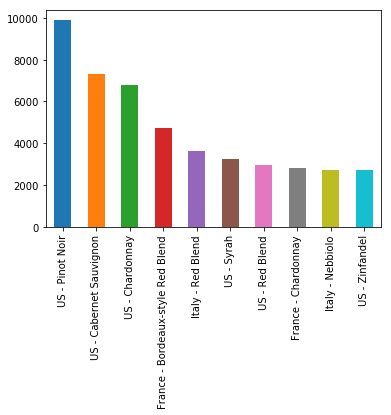

In [85]:
check_q6((combos["country"] + " - " + combos["variety"]).value_counts())

# Keep Going
**[Continue to grouping and sorting](https://www.kaggle.com/kernels/fork/598715).**

**Exercise 6**: Is a wine more likely to be "tropical" or "fruity"? Create a `Series` counting how many times each of these two words appears in the `description` column in the dataset.

Hint: use a map to check each description for the string `tropical`, then count up the number of times this is `True`. Repeat this for `fruity`. Create a `Series` combining the two values at the end.

In [4]:
tropical = reviews.description.map(lambda x: "tropical" in x).value_counts()
fruity = reviews.description.map(lambda x: "fruity" in x).value_counts()
#tropical = reviews.description.value_counts()
#fruity = reviews.description.value_counts()

In [5]:
result = pd.Series([tropical[True], fruity[True]], index = ["tropical","fruity"] )

In [6]:
result

tropical    3
fruity      3
dtype: int64

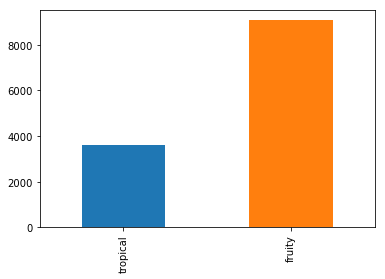

In [74]:
check_q7(result)